# Machine Learning Final Project

###### by Eric Huang

I hereby confirm that this submission is my work. I have cited above the origins of any parts of the submission that were taken from Websites, books, forums, blog posts, github repositories, etc.

I use Wikipedia for Enron scandal[https://en.wikipedia.org/wiki/Enron_scandal], Udacity ud120-projects codes and any related sklearn official documents for reference.

## Data Exploration

The Enron scandal, publicized in October 2001, eventually led to the bankruptcy of the Enron Corporation, an American energy company based in Houston, Texas, and the de facto dissolution of Arthur Andersen, which was one of the five largest audit and accountancy partnerships in the world. In addition to being the largest bankruptcy reorganization in American history at that time, Enron was cited as the biggest audit failure. In this project I will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal.

Financial data here is directly related to bankruptcy scandal, and emails somewhat show the relationship between different people which may be people of interest. In this final project, I will use these two kinds of information and properly choosen machine learning classifiers to predict real people of interest. 

In [1]:
import os
os.chdir('C:\Users\zhengyhu\Desktop\ud120-projects-master/final_project')

In [2]:
import sys
import pickle
from sklearn import preprocessing
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sys.path.append("../tools/")


from feature_format import featureFormat
from feature_format import targetFeatureSplit

### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi"]

### load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

Firstly let's inspect the important characters of the given dataset.

In [3]:
print "There are ", len(data_dict.keys()), " executives in Enron Dataset."

There are  146  executives in Enron Dataset.


In [4]:
print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [5]:
print "Value of first person in previous example :\n"
print data_dict['METTS MARK']
print "\nKeys of all related persons :\n"
print data_dict['METTS MARK'].keys()

Value of first person in previous example :

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}

Keys of all related persons :

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_th

In [6]:
print "Including 146 total person info, calculate number of POIs and number of non-POIs :"
num_POI = 0
for person in data_dict.keys():
    if data_dict[person]['poi']:
        num_POI += 1
print "Total number of POIs is ", num_POI
print "Total number of non-POIs is ", 146 - num_POI

Including 146 total person info, calculate number of POIs and number of non-POIs :
Total number of POIs is  18
Total number of non-POIs is  128


In [7]:
print "Total number of features :"
print len(data_dict['METTS MARK'].keys())

Total number of features :
21


In [8]:
print "For EACH features, calculate the number of missing values :"
features = data_dict['METTS MARK'].keys()
persons = data_dict.keys()
dict_for_missing_values = {}
for feature in features:
    dict_for_missing_values[feature] = 0
for person in data_dict.keys():
    for feature in features:
        if data_dict[person][feature] == 'NaN':
            dict_for_missing_values[feature] += 1
for key in dict_for_missing_values.keys():
    dict_for_missing_values[key] *= 1.0
    dict_for_missing_values[key] /= len(data_dict.keys())
print dict_for_missing_values

For EACH features, calculate the number of missing values :
{'salary': 0.3493150684931507, 'to_messages': 0.410958904109589, 'deferral_payments': 0.7328767123287672, 'total_payments': 0.14383561643835616, 'loan_advances': 0.9726027397260274, 'bonus': 0.4383561643835616, 'email_address': 0.23972602739726026, 'restricted_stock_deferred': 0.8767123287671232, 'total_stock_value': 0.136986301369863, 'shared_receipt_with_poi': 0.410958904109589, 'long_term_incentive': 0.547945205479452, 'exercised_stock_options': 0.3013698630136986, 'from_messages': 0.410958904109589, 'other': 0.363013698630137, 'from_poi_to_this_person': 0.410958904109589, 'from_this_person_to_poi': 0.410958904109589, 'poi': 0.0, 'deferred_income': 0.6643835616438356, 'expenses': 0.3493150684931507, 'restricted_stock': 0.2465753424657534, 'director_fees': 0.8835616438356164}


According to missing rate given, I will discard ANY feature whose NaN rate is greater than or equal to 50%.

In [9]:
print "Extract low NaN rate features"
current_valid_features = []
for key in dict_for_missing_values.keys():
    if dict_for_missing_values[key] < 0.5:
        current_valid_features.append(key)
print current_valid_features

Extract low NaN rate features
['salary', 'to_messages', 'total_payments', 'bonus', 'email_address', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'from_messages', 'other', 'from_poi_to_this_person', 'from_this_person_to_poi', 'poi', 'expenses', 'restricted_stock']


In my opinion, email_address feature is usually given to an employee by a company according to his or her name. As a result, it is overlapped with name and I will also discard this feature. Also since I do not know what "other" feature is, I will simply discard it. 

In [10]:
final_features = []
for feature in current_valid_features:
    if feature != 'email_address' and feature != 'other': # Discard both "email_address" and "other" feature!
        final_features.append(feature)
print "Final features to go to next step is ", final_features

Final features to go to next step is  ['salary', 'to_messages', 'total_payments', 'bonus', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'poi', 'expenses', 'restricted_stock']


## Outlier Detection and Removal

Use Pandas frame to deal with original data with final features given above.

In [11]:
import pandas as pd
import numpy as np

data = np.transpose(featureFormat(data_dict, final_features, remove_all_zeroes=False))
data_df = pd.DataFrame(data, final_features).transpose()
data_df.index = data_dict.keys()
data_df.head()

,salary,to_messages,total_payments,bonus,total_stock_value,shared_receipt_with_poi,exercised_stock_options,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,expenses,restricted_stock
METTS MARK,365788.0,807.0,1061827.0,600000.0,585062.0,702.0,0.0,29.0,38.0,1.0,0.0,94299.0,585062.0
BAXTER JOHN C,267102.0,0.0,5634343.0,1200000.0,10623258.0,0.0,6680544.0,0.0,0.0,0.0,0.0,11200.0,3942714.0
ELLIOTT STEVEN,170941.0,0.0,211725.0,350000.0,6678735.0,0.0,4890344.0,0.0,0.0,0.0,0.0,78552.0,1788391.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,1038185.0,58.0,651850.0,12.0,10.0,0.0,0.0,0.0,386335.0
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,6391065.0,1035.0,5538001.0,32.0,32.0,21.0,1.0,34039.0,853064.0


For finding outlier and feature engineering step, I will use data_df as a dataframe to execuate.

The next step is to find outliers. Outliers usually have very big or very small values compared with other normal data points. As a result, I first give a brief statistical description of ALL considered features (<= 50% NaN value features).  

In [12]:
data_df.salary.describe()

count    1.460000e+02
mean     3.658114e+05
std      2.203575e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.105960e+05
75%      2.708505e+05
max      2.670423e+07
Name: salary, dtype: float64

In [13]:
data_df.bonus.describe()

count    1.460000e+02
mean     1.333474e+06
std      8.094029e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+05
75%      8.000000e+05
max      9.734362e+07
Name: bonus, dtype: float64

It looks like that std for both "salary" and "bonus" are huge compare to mean. As a result, I assume that there should be some kinds of outliers in these two features.

In [14]:
data_df_bonus_salary = data_df[['salary', 'bonus']]
data_df_bonus_salary.head()

,salary,bonus
METTS MARK,365788.0,600000.0
BAXTER JOHN C,267102.0,1200000.0
ELLIOTT STEVEN,170941.0,350000.0
CORDES WILLIAM R,0.0,0.0
HANNON KEVIN P,243293.0,1500000.0


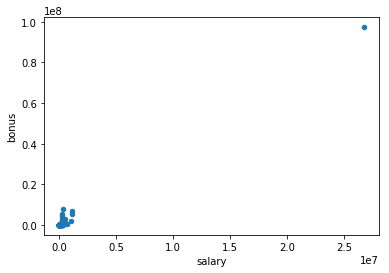

In [15]:
%matplotlib inline
data_df_bonus_salary.plot(kind = 'scatter', x = 'salary', y = 'bonus')

It looks like that a clear point at up right corner of this grpah is an outlier. Now I need to find it.

In [16]:
possible_outlier = data_df[data_df.salary == data_df.salary.max()]
print possible_outlier

           salary  to_messages  total_payments       bonus  total_stock_value  \
TOTAL  26704229.0          0.0     309886585.0  97343619.0        434509511.0   

       shared_receipt_with_poi  exercised_stock_options  from_messages  \
TOTAL                      0.0              311764000.0            0.0   

       from_poi_to_this_person  from_this_person_to_poi  poi   expenses  \
TOTAL                      0.0                      0.0  0.0  5235198.0   

       restricted_stock  
TOTAL       130322299.0  


Definitely, this is an outlier since this data point is the TOTAL summary of other data points. Next I will remove it from data_df and redraw the same graph again.

In [17]:
data_df_2 = data_df.drop('TOTAL')

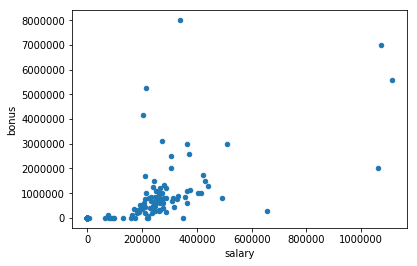

In [18]:
data_df_2.plot(kind = 'scatter', x = 'salary', y = 'bonus')

This graph looks much better now after I have removed "TOTAL" outlier!

I also tried to find unreasonalable values such as negative values for ANY of money related fields.

In [19]:
data_df_2[data_df_2.restricted_stock < 0.0]

,salary,to_messages,total_payments,bonus,total_stock_value,shared_receipt_with_poi,exercised_stock_options,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,expenses,restricted_stock
BHATNAGAR SANJAY,0.0,523.0,15456290.0,0.0,0.0,463.0,2604490.0,29.0,0.0,1.0,0.0,0.0,-2604490.0


I do not think "restricted_stock" can be below zero. I believe it is a typo but since this value can never be retrieved and this person is NOT a POI, I will give up this person.

In [20]:
data_df_3 = data_df_2.drop('BHATNAGAR SANJAY')

In [21]:
print len(data_df_3)

144


144 equals to 146 - 2 since I have removed just two outliers.

In [22]:
data_df_without_outlier = data_df_3
data_df_without_outlier.head()

,salary,to_messages,total_payments,bonus,total_stock_value,shared_receipt_with_poi,exercised_stock_options,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,expenses,restricted_stock
METTS MARK,365788.0,807.0,1061827.0,600000.0,585062.0,702.0,0.0,29.0,38.0,1.0,0.0,94299.0,585062.0
BAXTER JOHN C,267102.0,0.0,5634343.0,1200000.0,10623258.0,0.0,6680544.0,0.0,0.0,0.0,0.0,11200.0,3942714.0
ELLIOTT STEVEN,170941.0,0.0,211725.0,350000.0,6678735.0,0.0,4890344.0,0.0,0.0,0.0,0.0,78552.0,1788391.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,1038185.0,58.0,651850.0,12.0,10.0,0.0,0.0,0.0,386335.0
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,6391065.0,1035.0,5538001.0,32.0,32.0,21.0,1.0,34039.0,853064.0


Now I have finished outlier detection and will go through feature processing.

## Feature Selection / Engineering

In [23]:
list(data_df_without_outlier)

['salary',
 'to_messages',
 'total_payments',
 'bonus',
 'total_stock_value',
 'shared_receipt_with_poi',
 'exercised_stock_options',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'poi',
 'expenses',
 'restricted_stock']

After remove outliers, my first task in feature engineering is to generate new features using old features. Since "from_poi_to_this_person" and "from_this_person_to_poi" are absolute number which should be related to the number of all the messages this person sent. This fraction should be much more useful than "from_poi_to_this_person" and "from_this_person_to_poi" absolute number itself. Next I will use data_df_without_outlier to add these two new features. I named these two new features as "percentage_from_poi_to_this_person" and "percentage_from_this_person_to_poi".

In [24]:
### new features are:
###    percentage_from_poi_to_this_person : from_poi_to_this_person / to_messages
###    percentage_from_this_person_to_poi : from_this_person_to_poi / from_messages

data_df_without_outlier['percentage_from_poi_to_this_person'] = data_df_without_outlier.from_poi_to_this_person / data_df_without_outlier.to_messages
data_df_without_outlier['percentage_from_this_person_to_poi'] = data_df_without_outlier.from_this_person_to_poi / data_df_without_outlier.from_messages

### Fill all NaN to 0 since 0 of either to_messages or from_messages all means no emails to avoid devided by 0's NAN
data_df_without_outlier['percentage_from_this_person_to_poi'].fillna(0, inplace=True)
data_df_without_outlier['percentage_from_poi_to_this_person'].fillna(0, inplace=True)
new_features = data_df_without_outlier[['percentage_from_poi_to_this_person', 'percentage_from_this_person_to_poi', 'poi']]
print new_features.head()

                  percentage_from_poi_to_this_person  \
METTS MARK                                  0.047088   
BAXTER JOHN C                               0.000000   
ELLIOTT STEVEN                              0.000000   
CORDES WILLIAM R                            0.013089   
HANNON KEVIN P                              0.030622   

                  percentage_from_this_person_to_poi  poi  
METTS MARK                                  0.034483  0.0  
BAXTER JOHN C                               0.000000  0.0  
ELLIOTT STEVEN                              0.000000  0.0  
CORDES WILLIAM R                            0.000000  0.0  
HANNON KEVIN P                              0.656250  1.0  


In [25]:
list(data_df_without_outlier)

['salary',
 'to_messages',
 'total_payments',
 'bonus',
 'total_stock_value',
 'shared_receipt_with_poi',
 'exercised_stock_options',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'poi',
 'expenses',
 'restricted_stock',
 'percentage_from_poi_to_this_person',
 'percentage_from_this_person_to_poi']

**Next, I will use decision tree feature importance to compare original and my newly generated features.**

In [26]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Extract data features (X) and data labels (Y) from dataframe without outliers
X = data_df_without_outlier.drop('poi', axis = 1)
Y = data_df_without_outlier.poi

names = list(data_df_without_outlier)
del names[-5] # Here I need to drop fifth element from end since it is 'poi' according to previous list
rf = DecisionTreeClassifier()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)

Features sorted by their score:
[(0.2722, 'exercised_stock_options'), (0.1782, 'shared_receipt_with_poi'), (0.1361, 'percentage_from_this_person_to_poi'), (0.1193, 'expenses'), (0.1088, 'from_poi_to_this_person'), (0.0726, 'total_payments'), (0.0423, 'salary'), (0.0423, 'bonus'), (0.0282, 'restricted_stock'), (0.0, 'total_stock_value'), (0.0, 'to_messages'), (0.0, 'percentage_from_poi_to_this_person'), (0.0, 'from_this_person_to_poi'), (0.0, 'from_messages')]


I did not explicitly test my engineered features using decision tree or naive bayse classifier but I use decision tree's feature importances value to determine the importance of both original and newly added features. It looks like that 'percentage_from_poi_to_this_person' does not have high importance as what I expected previously since its importance did not beat that of 'from poi to this person'. However, 'percentage_from_this_person_to_poi' beat its corresponding version - 'from_this_person_to_poi'.

Next I will use recursive feature selection (recursive feature elimination) to select features.

Optimal number of features : 6
[False False  True False  True  True  True False False False  True False
 False  True]
Selected features with recursive feature select using decision tree classifier:
['total_payments', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'expenses', 'percentage_from_this_person_to_poi']


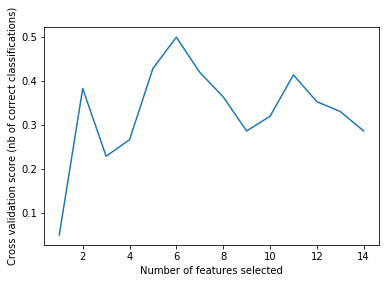

In [103]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

dtc = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc, step=1, cv=10, scoring='precision') # scoring choose between 'precision' or 'recall'
rfecv.fit(X, Y)

print "Optimal number of features : %d" % rfecv.n_features_
print rfecv.support_

print "Selected features with recursive feature select using decision tree classifier:"
choose = rfecv.support_
selected_features = []
for idx in range(len(names)):
    if choose[idx]:
        selected_features.append(names[idx])
print selected_features
 
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Since I will mainly use naive bayse and decision tree machine learning algorithms to do machine learning classification in next part. Naive bayse is a graphical-model based classifier which is invarient to feature scaling. Decision tree will split within one feature so feature scale is not necessary for it. As a result, I do NOT use any scale method here in this final project. 

Next, I will use these two machine learning classifiers to do prediction.

## Parameters Tuning and Performance Validation

In order to use tester.py to give project evaluator both precison and recall, I need to save previous pandas dataframe to a dictionary of dictionary so that my machine learning algorithm, features I considered and final data set can be properly saved in .pkl files.

Below is the function to do this transformation.

In [54]:
### Convert DataFrame to a dictionary of dictionary
def convert_df_to_dict_of_dict(df):
    '''
        dictionary keys are names of persons in dataset
        dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person
    '''
    list_of_person = df.index.values
    feature_list = list(df)
    rst = {}
    for person in list_of_person:
        cur_dict = {}
        for feature in feature_list:
            cur_dict[feature] = df.loc[person, feature]
        rst[person] = cur_dict
    return rst

For each of the two machine learning classifier, I do exactly the same things:
    * Convert data frame to dictionary of dictionary;
    * Split train and test data sets for target classifier for future validation;
    * Train the classifier with properly choosen parameters;
    * Get three metrics -> precision, recall and accuracy;
    * Dump three required .pkl files for tester.py to test.

First machine learning classifier - decision tree:

**What validation is and why it is important?**

Normally a known set of data will be splitted into three parts - training, validation and testing in a whole machine learning process. The validation data is taken out from whole data set since it is only used for hyperparameter tunning. Here hyperparameter means parameters of machine learning classifier that has to be fixed before training. The reason why validation data set and testing data set should not be overlapped is that if these two data sets are overlapped, then some information only exists in testing data may be leaked into process of getting optimal hyperparameter tunning which will potientially lead to overfitting of a certain machine learning classifier. The validation process is important since one can use it to get optimal hyperparameters without making the machine learning classifier overfitting. Otherwise one needs to use past experience to tuning hyperparameters without validation.     

**The detail about my decision tree validation process and the rational behind it**

Since I do not tune any hyperparameters in naive bayse classifier, I will only address the process of validation of my decision tree classifier in detail. My codes below use GridSearchCV in sklearn to exhaustive search over specified hyperparameter values for a decision tree classifier. I use cross_validation.train_test_split() to hold 10% of test data set which I will never touch before prediction with tunned hyperparameter trained decision tree classifier. Next, I defined one hyperparameter - 'min_samples_split' to tune in range 2 to 10. The default cross-validation folder number is 3 when I do not assign it in GridSearchCV(). The cross-validation process is to split training data set to 3 same size sets. Each time, one set will be used as a validation set and the other two sets will be the training set for validation. Thus for each hyperparameter options from 2 to 10, three scores can be calculated after use training set for validation to fit for decision tree and use validation set to do prediction. Use something like the average of three scores to present the performance of each hyperparameter candidates and choose the one with best performance. Why not only use one folder but use multiple folders for cross-validation? The reason is for robustness. If use only one time of cross-validation, it is possible that training set (2/3 of original training data) and validation set (1/3 of original training data) each has some pattern which may result in a special combination of training and validation sets. Do it three times with each 1/3 of original training set can be set as validation data set can largely decreases this possibility. However, use more cv folds means more training validation data, more times of running classifier which implies more time spent in cross-validation. As a result, this is a tradeoff between good for generalize hyperparameter and time spent in cross-validation.   

In [112]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi".
### I manually select these features with the help of tester.py
### The following features are the final features I used for decision tree classifier
# features_list = ['poi', 'salary', 'bonus', 'shared_receipt_with_poi', 'percentage_from_poi_to_this_person', 'percentage_from_this_person_to_poi']
features_list = ['poi'] + selected_features

### store to my_dataset for easy export below
my_dataset = convert_df_to_dict_of_dict(data_df_without_outlier)

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)

### please name your classifier clf for easy export below
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### first use decision tree as machine learning classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

### Tune parameters using GridSearchCV
param_grid = {'min_samples_split': np.arange(2, 10)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)

clf = clf.fit(features_train,labels_train)
print "Best parameter for min_sample_split is:"
print clf.best_estimator_
pred= clf.predict(features_test)

print "accuracy = ", accuracy_score(labels_test, pred)
print 'precision = ', precision_score(labels_test,pred)
print 'recall = ', recall_score(labels_test,pred)

### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(my_dataset, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

Best parameter for min_sample_split is:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy =  0.8
precision =  0.5
recall =  0.333333333333


**Here is what it means to perform parameter tuning and why it is important?**

One of the biggest problem when using some of the machine learning classifier is that some parameters need to be set before the training of it. Parameter tuning is a process of using some data to get a optimal value of these parameters in respect to the performance of machine learning classifier. This kind of parameters are called hyperparameter. Since these parameters will influence the performance of trained machine learning classifier, it is very important. 

In decision tree classifier, I tuned only one parameter called "min_samples_split". It is the minimum number of samples required to split an internal node in the decision tree. If this number (assume it is integer) is too small, then this decision tree model will tend to overfit since decision tree leaf can contain only small number of data points. While this number is too big, then it will restrict decision tree's total number of splits which will result in underfit. Here I choose range 2 to 10 and find range 3 to 7 out performs other numbers in the range. 

Second machine learning classifier - Naive Bayse:

In [110]:
from sklearn.naive_bayes import GaussianNB

### features_list is a list of strings, each of which is a feature name
### first feature must be "poi".
### I manually select these features with the help of tester.py
### The following features are the final features I used for naive bayse
# features_list = ['poi', 'salary', 'bonus', 'total_stock_value', 'shared_receipt_with_poi', 'exercised_stock_options', 'from_poi_to_this_person', 'from_this_person_to_poi', 'expenses', 'restricted_stock', 'percentage_from_poi_to_this_person', 'percentage_from_this_person_to_poi']
features_list = ['poi'] + selected_features

### store to my_dataset for easy export below
my_dataset = convert_df_to_dict_of_dict(data_df_without_outlier)

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)

### please name your classifier clf for easy export below
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use manual tuning parameter max_depth
clf = GaussianNB()
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)

print "accuracy = ", accuracy_score(labels_test, pred)
print 'precision = ', precision_score(labels_test,pred)
print 'recall = ', recall_score(labels_test,pred)

### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(my_dataset, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy =  0.866666666667
precision =  1.0
recall =  0.333333333333


The previous performance between decision tree and naive bayse looks similar but recall of naive bayse is below 0.3 after running tester.py. As a result, I will choose decision tree as my final machine learning classifier.

## Discussion and Conclusions

In this part, I will summarize the decision tree classifier's result. I use three metrics - precision, recall and accuracy. The accuracy is the most easy one to understand. It shows how many percentage of data points in testing set is correctly classified. However, due to the very low ratio of people of interest devided by total number of people, this measure is not useful at all. For example, if I do not use ANY classifier but guess that every person in testing set is NOT people of interest, I will get a roughly (128 - 18) / 128 = 86% accuracy. On the other hand, the target of this final project is to FIND people of interest and make them responsible for what they do in court hopefully. From this point of view, I believe it is a good idea not to classify innocent people as people of interest(guilty). In other words, false positive rate should be low. Precision takes false positive into consideration. The result of my final decision tree classifier through tester.py is about 38%. This percentage shows that about 62% unknown people classified by this decision tree classifier as positive (POI) is really negative (non-POI). The final metric is recall. Instead of taking false positive into account like precision, recall take false negative into consideration. In this specific predict people of interest example, false negative rate refer to those who are people of interest(guilty) are classified as not guilty. Although I believe this is not as important as to classify good people as bad, but it is still a much more powerful metric compared with accuracy since this metric will directly influence how many bad guys go back to society with an innocent face. My final trained decision tree classifier gave about 33% recall after running tester.py. This recall means about 33% people of interest will be classified by this decision tree classifier as not people of interest.   

==========

Run tester.py on generated three .pkl files to make sure both precision and recall are over 0.3.

In [59]:
import os
import subprocess

In [113]:
print "Running tester.py to test my classifier's precision and recall.... "
os.system("python tester.py")
print subprocess.check_output(["python", "tester.py"])

Running tester.py to test my classifier's precision and recall.... 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
	Accuracy: 0.84053	Precision: 0.38774	Recall: 0.33850	F1: 0.36145	F2: 0.34732
	Total predictions: 15000	True positives:  677	False positives: 1069	False negatives: 1323	True negatives: 11931




===== END of Final Project Report =====